# NLP BASIC - HuggingFace Transformer 이용!
 - Tokenizer 가 같이 제공됩니다.

## Install Transforemrs

In [ ]:
## Transformer 설치
!pip install transformers
# !pip install --no-cache-dir transformers sentencepiece

## Google Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install wandb -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00


## Import

In [ ]:
import re
import os
import gc
import time
import random
import string

import copy
from copy import deepcopy

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import wandb
# Utils
from tqdm import tqdm

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# For descriptive error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
## Pytorch Import
import torch
import torch.nn as nn

from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader

In [ ]:
## Transforemr Import
from transformers import AutoTokenizer, AutoModel, AdamW, AutoConfig

## GPU 확인

In [ ]:
# 할당된 GPU 확인
!nvidia-smi

Tue May  7 05:00:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## Data

In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/train.csv'

data = pd.read_csv(data_path)

# ss = pd.read_csv(data_path + "sample_submission.csv")

In [ ]:
data.shape

(25000, 3)

In [ ]:
train = data[:17500]
test = data[17500:]
train.shape

(17500, 3)

In [ ]:
train.target.unique()

## Target Categorical Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['new_target'] = encoder.fit_transform(train['target'])

In [ ]:
train.head()

,id,reviews,target,new_target
0,0,조아요 처음구입 싸게햇어요,2,1
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,0
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,1
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,1
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,3


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['new_target'].plot(kind='hist', bins=20, title='new_target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='id', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='target', y='new_target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['target']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('target')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['new_target']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('new_target')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['new_target'].plot(kind='line', figsize=(8, 4), title='new_target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='id', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='target', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='new_target', y='reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## HuggingFace 어디까지 아시나요?
 - 그런데 슬프게도 저도 잘 몰라요 ㅎㅎ...

In [ ]:
# from transformers import AutoTokenizer, AutoModel, AdamW, AutoConfig
model_name ='klue/roberta-base'

model = AutoModel.from_pretrained(model_name)
# AutoModelForSequenceClassification
# -> AutoModel과 사용법이 조금 다르다.
# -> Huggingface transformers에 모델 종류는 많으나, 용법이 조금씩 다 다르다. (모델의 목적이 다 다르기 때문)

tokenizer = AutoTokenizer.from_pretrained(model_name)
# BERTtokenizer, RoBertaTokenizer, electratokenizer

config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

In [ ]:
text = "고로 나는 지금 괴롭다."

In [ ]:
# 이렇게도 사용 가능하지만,
# tokenizer.tokenize(text)

In [ ]:
# 저는 주로 이렇게 씁니다.
inputs = tokenizer.encode_plus(text,
                      truncation = True,
                      add_special_tokens = True,
                      max_length = 12,
                      padding = 'max_length')

In [ ]:
inputs # dict

{'input_ids': [0, 13237, 717, 2259, 3660, 8472, 2062, 18, 2, 1, 1, 1], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]}

In [ ]:
len(inputs['input_ids'])

12

In [ ]:
inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
inputs['input_ids']

[0, 13237, 717, 2259, 3660, 8472, 2062, 18, 2, 1, 1, 1]

In [ ]:
inputs['attention_mask']

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

In [ ]:
tokenizer.tokenize(text)

['고로', '나', '##는', '지금', '괴롭', '##다', '.']

In [ ]:
inputs['token_type_ids'] # model 에 안 들어감

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
ids = torch.tensor(inputs['input_ids'], dtype = torch.long).unsqueeze(0)
mask = torch.tensor(inputs['attention_mask'], dtype = torch.long).unsqueeze(0)
ids.shape, mask.shape

(torch.Size([1, 12]), torch.Size([1, 12]))

In [ ]:
out = model(ids, mask)
# model 안에 nn.Embedding(input_dim, hidden_size(=768)) 내장

In [ ]:
out.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [ ]:
out[0].shape # out['last_hidden_state'] [bs, sl, hidden_size] -> [1, 12, 768] # 토큰별 임베딩

torch.Size([1, 12, 768])

In [ ]:
out[1].shape # out['pooler_output'] [bs, hidden_size] -> [1, 768] # 문장 단위 임베딩

torch.Size([1, 768])

## Prepare Loaders

In [ ]:
class MyDataset(Dataset):

    def __init__(self, df = train, tokenizer = tokenizer, max_length = 128):
        self.df = df
        self.max_len = max_length
        self.tokenizer = tokenizer
        self.reviews = df['reviews']
        self.target = df['new_target']

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        reviews = self.reviews[index] # "이거 별류얌...."
        inputs = self.tokenizer.encode_plus(
            reviews,
            truncation=True,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length'
            )
        # input_ids, attention_mask, token_type_ids

        ids = inputs['input_ids']
        mask = inputs['attention_mask']

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'target': torch.tensor(self.target[index], dtype=torch.long)
        }

In [ ]:
data = MyDataset()[222]
data['ids'].shape, data['mask'].shape, data['target'].shape

(torch.Size([128]), torch.Size([128]), torch.Size([]))

In [ ]:
data['target']

tensor(1)

In [ ]:
def prepare_loaders(df = train,
                    tokenizer = tokenizer, max_length = 128,
                    index_num = int(0.8 * train.shape[0]),
                    bs = 32):

   # train, valid split
    train_df = train[:index_num].reset_index(drop=True)
    valid_df = train[index_num:].reset_index(drop=True)

    ## train, valid -> Dataset
    train_ds = MyDataset(train_df,
                       tokenizer = tokenizer,
                       max_length = max_length)

    valid_ds = MyDataset(valid_df,
                       tokenizer = tokenizer,
                       max_length = max_length)

    # Dataset -> DataLoader
    train_loader = DataLoader(train_ds,
                              batch_size = bs,
                              num_workers = 2,
                              shuffle = True,
                              pin_memory = True,
                              drop_last= False
                              )

    valid_loader = DataLoader(valid_ds,
                              batch_size = bs,
                              num_workers = 2,
                              shuffle = False,
                              pin_memory = True,
                              drop_last= False
                              )

    return train_loader, valid_loader

In [ ]:
train_loader, valid_loader = prepare_loaders()

In [ ]:
sample = next(iter(train_loader))
sample['ids'].shape, sample['mask'].shape, sample['target'].shape

(torch.Size([32, 128]), torch.Size([32, 128]), torch.Size([32]))

# Model

In [ ]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda', index=0)

In [ ]:
# ## Model
# class Model(nn.Module):

#     def __init__(self, model_name = 'klue/roberta-base'):
#         super(Model, self).__init__()
#         self.model = AutoModel.from_pretrained(model_name)
#         self.config = AutoConfig.from_pretrained(model_name)
#         # out['pooler_output] = [bs, 768]
#         # classification: 4 classes
#         # fc: nn.Sequential(nn.Linear(768, 4), LogSoftmax(dim=-1))

#         self.drop = nn.Dropout(p=0.35)
#         self.fc = nn.Sequential( nn.Linear(self.config.hidden_size, 4), nn.LogSoftmax(dim = -1) )

#     def forward(self, ids, mask):
#         out = self.model(input_ids=ids,
#                          attention_mask=mask,
#                          output_hidden_states=False)
#         out = self.drop(out[1]) # out['pooler_output']
#         # out.keys(): ['last_hidden_state', 'pooler_output']
#         outputs = self.fc(out)

#         return outputs
class Model(nn.Module):

    def __init__(self, model_name='klue/roberta-base'):
        super(Model, self).__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.config = AutoConfig.from_pretrained(model_name)
        # out['pooler_output] = [bs, 768]
        # classification: 4 classes
        # fc: nn.Sequential(nn.Linear(768, 4), LogSoftmax(dim=-1))

        self.drop = nn.Dropout(p=0.35)
        self.fc = nn.Sequential(nn.Linear(self.config.hidden_size, 4), nn.LogSoftmax(dim=-1))

    def forward(self, ids, mask):
        out = self.model(input_ids=ids,
                         attention_mask=mask,
                         output_hidden_states=True)  # Set output_hidden_states to True to get hidden states
        hidden_states = out.last_hidden_state  # Shape: [batch_size, seq_length, hidden_size]
        mask_expanded = mask.unsqueeze(-1).expand_as(hidden_states)  # Expand mask for element-wise multiplication

        # Apply mask to hidden states
        masked_hidden_states = hidden_states * mask_expanded.float()

        # Compute sum of hidden states along the sequence length dimension
        sum_hidden_states = masked_hidden_states.sum(1)  # Shape: [batch_size, hidden_size]

        # Compute average by dividing by the sum of mask values along the sequence length dimension
        avg_hidden_states = sum_hidden_states / mask_expanded.sum(1).clamp(min=1e-9)  # Shape: [batch_size, hidden_size]

        avg_hidden_states = self.drop(avg_hidden_states)
        outputs = self.fc(avg_hidden_states)

        return outputs


In [ ]:
model = Model(model_name).to(device)

Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
y_out = model(sample['ids'].to(device), sample['mask'].to(device))
y_out.shape

torch.Size([32, 4])

## Loss Function and Optimizer

In [ ]:
from torch.optim.lr_scheduler import StepLR
loss_fn = nn.NLLLoss().to(device)
optimizer = torch.optim.Adam(model.parameters())
torch.nn.utils.clip_grad_norm_(model.parameters(),5)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)  # StepLR은 매 step_size마다 학습률을 gamma만큼 감소시킵니다.


## Train_one_epoch

In [ ]:
# train_loss => 실시간 단위로 구할 예정
# accuracy => 실시간 단위로 구할 예정
from sklearn.metrics import f1_score
from tqdm import tqdm
epoch = 1

def train_one_epoch(model = model, dataloader = train_loader, loss_fn = loss_fn,
                    optimizer = optimizer, device = device, epoch = epoch):
    model.train()
    train_loss, dataset_size = 0,  0

    preds, trues, all_preds, all_labels = [], [], [], []

    bar = tqdm(dataloader, total = len(dataloader))
    for data in bar:
        # x = data[0].to(device)
        ids = data['ids'].to(device)
        mask = data['mask'].to(device)

        y_true = data['target'].to(device)

        y_pred = model(ids, mask)
        loss = loss_fn(y_pred, y_true)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        bs = ids.shape[0]
        dataset_size += bs
        train_loss += (loss.item() * bs)
        train_epoch_loss = train_loss / dataset_size

        preds.append(y_pred)
        trues.append(y_true)

        preds_cat = torch.cat(preds, dim = 0)
        trues_cat = torch.cat(trues, dim = 0)


        train_acc = 100*(torch.argmax(preds_cat, dim =-1) == trues_cat).sum().item() / dataset_size
        bar.set_description(f"Epoch{epoch:02d}|TL:{train_epoch_loss:.3e}|ACCURACY:{train_acc:.2f}")
    # print(train_epoch_loss, train_acc)
    # train_f1 = f1_score(all_labels, all_preds, average='macro')
    return train_epoch_loss, train_acc
    # , train_f1


In [ ]:
# train_one_epoch(model = model, dataloader = train_loader, loss_fn = loss_fn, optimizer = optimizer,
#                                       device = device, epoch = epoch)

## Valid one epoch

In [ ]:
# train_loss => 실시간 단위로 구할 예정
# accuracy => 실시간 단위로 구할 예정

from tqdm import tqdm
epoch = 1

@torch.no_grad()
def valid_one_epoch(model = model, dataloader = valid_loader, loss_fn = loss_fn,
                    device = device, epoch = epoch):
    model.eval()
    valid_loss, dataset_size = 0,  0

    preds, trues, all_preds, all_labels = [], [], [], []

    bar = tqdm(dataloader, total = len(dataloader))
    with torch.no_grad():
        for data in bar:
            ids = data['ids'].to(device)
            mask = data['mask'].to(device)

            y_true = data['target'].to(device)

            y_pred = model(ids, mask)

            loss = loss_fn(y_pred, y_true)

            bs = ids.shape[0]
            dataset_size += bs
            valid_loss += (loss.item() * bs)
            valid_epoch_loss = valid_loss / dataset_size

            preds.append(y_pred)
            trues.append(y_true)


            preds_cat = torch.cat(preds, dim = 0)
            trues_cat = torch.cat(trues, dim = 0)

            # all_preds.extend(preds_cat.cpu().numpy())
            # all_labels.extend(trues_cat.cpu().numpy())

            valid_acc = 100*(torch.argmax(preds_cat, dim =-1) == trues_cat).sum().item() / dataset_size
            bar.set_description(f"Epoch{epoch:02d}|VL:{valid_epoch_loss:.3e}|ACCURACY:{valid_acc:.2f}")
        # valid_f1 = f1_score(all_labels, all_preds, average='macro')
    return valid_epoch_loss, valid_acc
    # , valid_f1


### Run Train

In [ ]:
def run_train(model = model, loss_fn = loss_fn, optimizer = optimizer, train_loader = train_loader, valid_loader = valid_loader):


    n_epochs = 3
    # n_epochs 는 5를 넘기지 않습니다.
    # pretrained model 파인튜닝할 때, 에폭이 5이상 돌리면, 오버피팅 됩니다.
    # 학습이 되어있는 모델이기 때문입니.

    wandb.init(project="classification_0507", name="schedular",
               config={
                   "learning_rate": optimizer.param_groups[0]['lr'],
                   "architecture": "haewon",
                   "dataset": "CIFAR-10",
                   "epochs": n_epochs,
               })

    config = wandb.config


    print_iter =1

    lowest_loss, lowest_epoch = np.inf, np.inf
    early_stop = 3

    train_hs, valid_hs = [],  [] # visualization
    train_accs, valid_accs = [],  [] # visualization




    for epoch in range(n_epochs):
        train_loss, train_acc = train_one_epoch(model = model, dataloader = train_loader, loss_fn = loss_fn, optimizer = optimizer,
                                      device = device, epoch = epoch)
        valid_loss, valid_acc = valid_one_epoch(model = model, dataloader = valid_loader, loss_fn = loss_fn,
                                      device = device, epoch = epoch)
        # 줍줍

        train_hs.append(train_loss)
        valid_hs.append(valid_loss)

        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

        if (epoch + 1) % print_iter == 0:
            print()
            print(f"Ep:[{epoch + 1:02d}]|TL:{train_loss:.4e}|VL:{valid_loss:.4e}|LL:{lowest_loss:.4e}|")
            print()
        # Lowest Loss 갱신 - valid_loss 기준
        if valid_loss < lowest_loss:
            lowest_loss = valid_loss
            lowest_epoch = epoch
            # model 저장
            torch.save(model.state_dict(), './model.bin') # pt, pth

        else:
            if early_stop > 0 and lowest_epoch + early_stop < epoch + 1:
                print("넌 삽 질 중")
                break
        wandb.log({"Train Loss": train_loss, "Valid Loss": valid_loss, "Train acc": train_acc, "Valid acc": valid_acc, "Epoch": epoch + 1})


    print()
    print("The Best Validation Loss=%.4e at %d Epoch" % (lowest_loss, lowest_epoch))
    wandb.finish()

    # model load
    model.load_state_dict(torch.load('./model.bin'))



    result = dict()
    result["Train Loss"] = train_hs
    result["Valid Loss"] = valid_hs

    result["Train Acc"] = train_accs
    result["Valid Acc"] = valid_accs


    return result, model


In [ ]:
result, model = run_train()

Epoch00|TL:1.309e+00|ACCURACY:39.52: 100%|██████████| 438/438 [04:51<00:00,  1.50it/s]
Epoch00|VL:1.280e+00|ACCURACY:39.57: 100%|██████████| 110/110 [00:23<00:00,  4.72it/s]



Ep:[01]|TL:1.3087e+00|VL:1.2803e+00|LL:inf|



Epoch01|TL:1.298e+00|ACCURACY:39.70: 100%|██████████| 438/438 [04:51<00:00,  1.50it/s]
Epoch01|VL:1.280e+00|ACCURACY:39.57: 100%|██████████| 110/110 [00:23<00:00,  4.64it/s]



Ep:[02]|TL:1.2981e+00|VL:1.2803e+00|LL:1.2803e+00|



Epoch02|TL:1.298e+00|ACCURACY:39.69: 100%|██████████| 438/438 [04:51<00:00,  1.50it/s]
Epoch02|VL:1.280e+00|ACCURACY:39.57: 100%|██████████| 110/110 [00:23<00:00,  4.68it/s]



Ep:[03]|TL:1.2977e+00|VL:1.2803e+00|LL:1.2803e+00|


The Best Validation Loss=1.2803e+00 at 0 Epoch


### Visualization

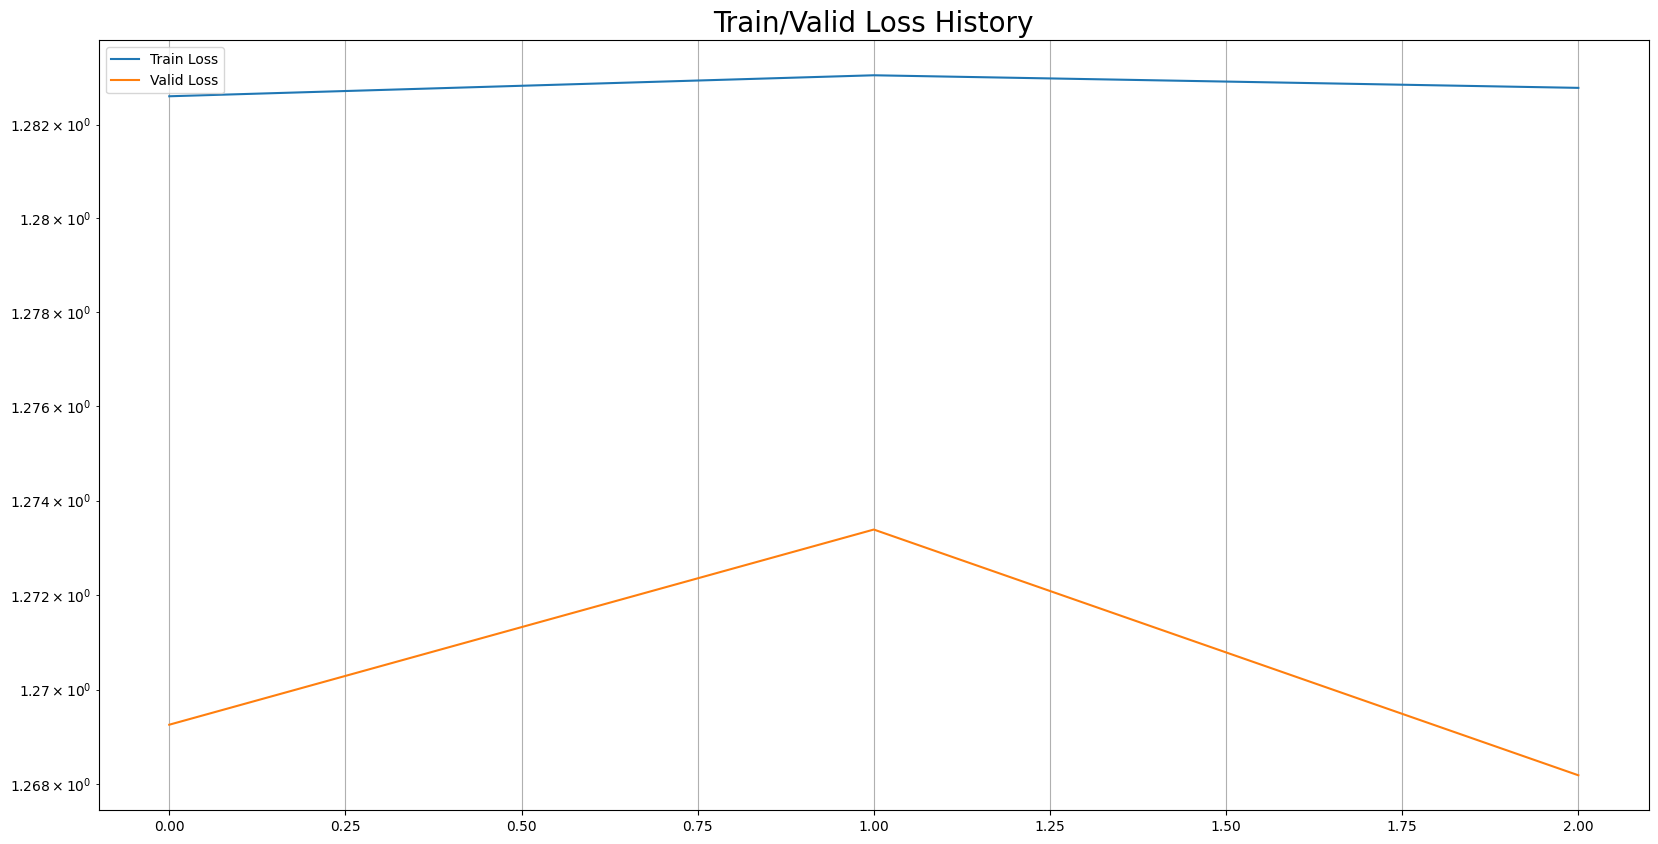

In [ ]:
## Train/Valid History
plot_from = 0
plt.figure(figsize=(20, 10))
plt.title("Train/Valid Loss History", fontsize = 20)
plt.plot(
    range(0, len(result['Train Loss'][plot_from:])),
    result['Train Loss'][plot_from:],
    label = 'Train Loss'
    )

plt.plot(
    range(0, len(result['Valid Loss'][plot_from:])),
    result['Valid Loss'][plot_from:],
    label = 'Valid Loss'
    )

plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

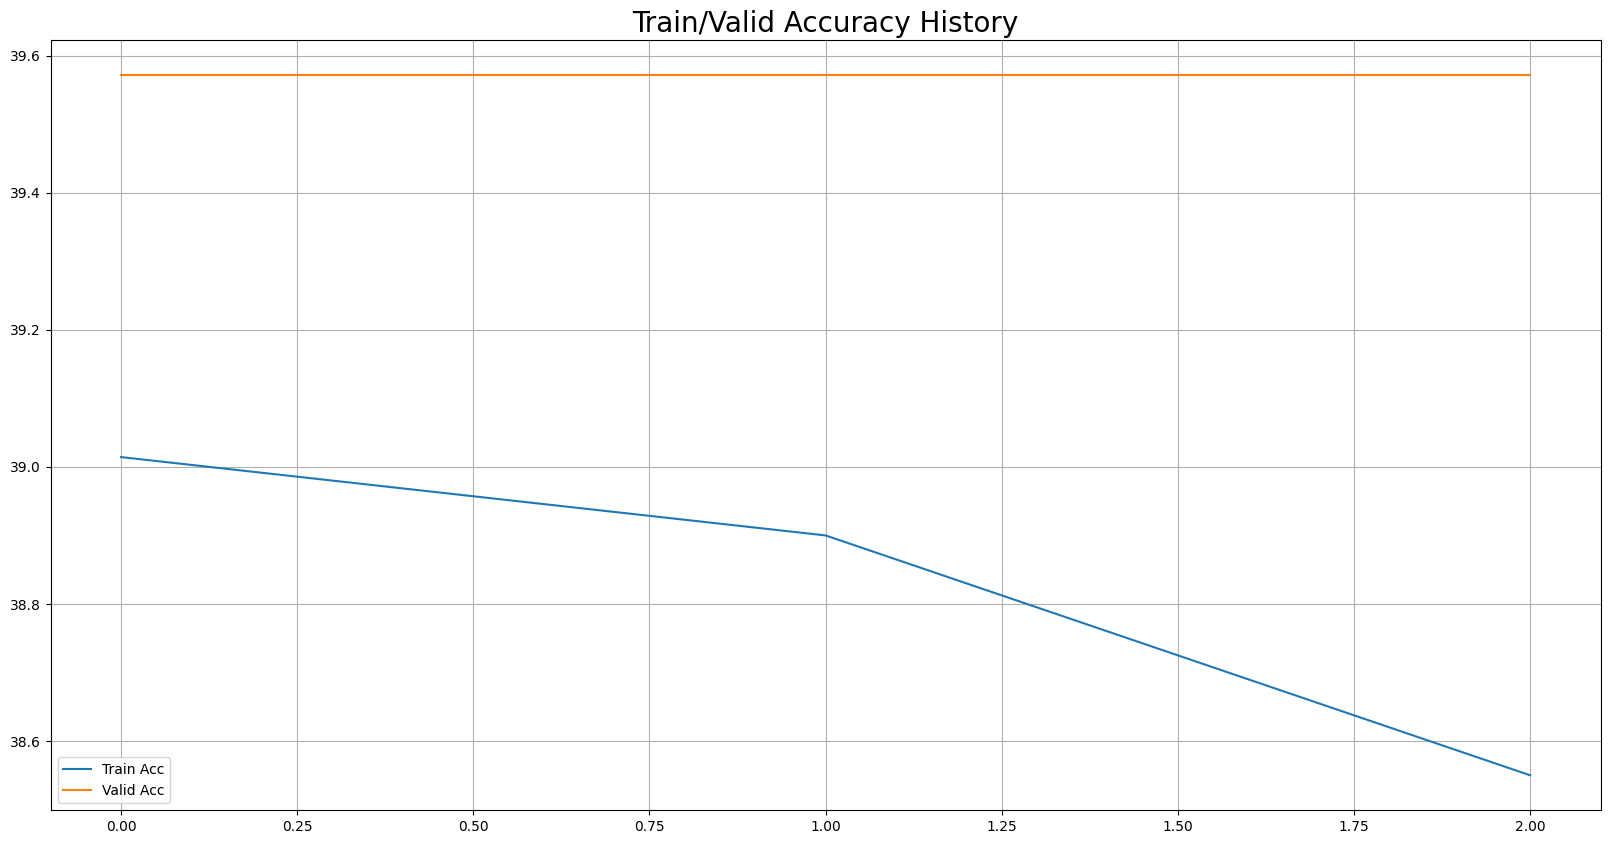

In [ ]:
# Train/Valid Accuracy
plot_from = 0
plt.figure(figsize=(20, 10))
plt.title("Train/Valid Accuracy History", fontsize = 20)
plt.plot(
    range(0, len(result['Train Acc'])),
    result['Train Acc'],
    label = 'Train Acc'
    )

plt.plot(
    range(0, len(result['Valid Acc'])),
    result['Valid Acc'],
    label = 'Valid Acc'
    )

plt.legend()
# plt.yscale('log')
plt.grid(True)
plt.show()